In [24]:
from basic_functions import data_load
#Load Datasets
X_train = data_load("data/X_train.csv")
y_train = data_load("data/y_train_clustered.csv")

Data loaded!
Data loaded!


In [30]:
X_train["job_category"] = X_train["job"].astype(str).str[0]

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_crosstab_heatmap(X, y, feature, 
                          desired_order=None, 
                          index_labels=None, 
                          cmap="Blues", 
                          figsize=(12, 6)):


    table = pd.crosstab(X[feature], y, normalize="index")
    table_rounded = (table * 100).round(1)

    # Falls Reihenfolge vorgegeben
    if desired_order:
        table_rounded = table_rounded[desired_order]

    # Falls Zeilenlabels angegeben
    if index_labels:
        table_rounded.index = index_labels

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(table_rounded.values, cmap=cmap)

    ax.set_xticks(range(len(table_rounded.columns)))
    ax.set_xticklabels(table_rounded.columns, rotation=45, ha="right")
    ax.set_yticks(range(len(table_rounded.index)))
    ax.set_yticklabels(table_rounded.index)
    
    for i, row_label in enumerate(table_rounded.index):
        for j, col_label in enumerate(table_rounded.columns):
            value = table_rounded.loc[row_label, col_label]
            ax.text(j, i, f"{value}%", ha="center", va="center", color="r")

    ax.set_title(f"income distribution by {feature}")
    fig.tight_layout()
    plt.show()

    return table_rounded


In [27]:
desired_order = ["lowest", "lower middle", "middle", "high", "highest"]

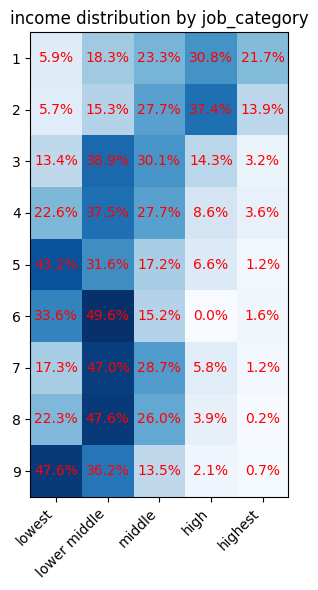

income,lowest,lower middle,middle,high,highest
job_category,,,,,
1,5.9,18.3,23.3,30.8,21.7
2,5.7,15.3,27.7,37.4,13.9
3,13.4,38.9,30.1,14.3,3.2
4,22.6,37.5,27.7,8.6,3.6
5,43.2,31.6,17.2,6.6,1.2
6,33.6,49.6,15.2,0.0,1.6
7,17.3,47.0,28.7,5.8,1.2
8,22.3,47.6,26.0,3.9,0.2
9,47.6,36.2,13.5,2.1,0.7


In [31]:
plot_crosstab_heatmap(X=X_train, y = y_train["income"], feature = "job_category", desired_order= desired_order)